# Readme

The MCPD claim that they allocate officers (and make traffic stops) based on accidents in each area. This file examines the veracity of that claim

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

In [2]:
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', None)
import numpy as np
import itertools
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from shapely.geometry import Point
# from tqdm import tqdm

In [3]:
df = pd.read_csv(r"C:\Users\mikha\Dropbox\mikhael_misc\Projects\Policing Thesis\New Modified Dataset.csv")

# Cleaning Data

## Create "Unique" Var (but now it's loaded - no need to run)

In [4]:
# unique = []
# for i in list(range(1,len(df))):
#     if df['Stop ID'].iloc[i-1] != df['Stop ID'].iloc[i]:
#         unique.append(1)
#     else:
#         unique.append(0)
     
# unique = [1] + unique

# del df['First Unique']

# df.insert(1, 'First Unique', unique)


# df.to_csv(r"C:\Users\mikha\Dropbox\mikhael_misc\Projects\Policing Thesis\New Modified Dataset.csv", index=False)

## Define Race set

In [5]:
race_set = {'ASIAN', 'BLACK', 'HISPANIC', 'NATIVE AMERICAN', 'OTHER', 'WHITE'}
race_set_w_total = {'ASIAN', 'BLACK', 'HISPANIC', 'NATIVE AMERICAN', 'OTHER', 'TOTAL', 'WHITE'}

## Injuries without Accidents

Some observations have injuries but no accidents. I remove those

### First, confirm that they're randomly distributed

In [6]:
# gdf = gpd.GeoDataFrame(
#     df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [7]:
# gdf[(gdf['Accident']==0) & (gdf['Personal Injury']==1) & (gdf['Latitude']!=0) & (gdf['Longitude']<=-75)].plot(figsize=(15,15), markersize=.4)

### Now remove them

In [8]:
df = df[~((df['Accident']==0) & (df['Personal Injury']==1))]

# Data Wrangling

*coordinates_dict[ longitude_i ][ latitude_j ][ FIELD** ][ race ] = information for that area*

** "field" equals things like "Number of Charges @ 9 MPH", "Average Speed NOT in 9,14 MPH", etc

## Set up *coordinates_dict*

In [ ]:
CELL_WIDTH = 0.0001
DECIMAL_PLACES = 4

MIN_LONGITUDE = -77.6
MAX_LONGITUDE = -76.8

MIN_LATITUDE = 38.92
MAX_LATITUDE = 39.5

def rounder(x):#rounds to nearest CELL_WIDTH; X decimal places
    return np.around(CELL_WIDTH * round(x/CELL_WIDTH), DECIMAL_PLACES)

TOTAL_CELLS = round((((MIN_LONGITUDE-CELL_WIDTH)-(MAX_LONGITUDE+CELL_WIDTH))/CELL_WIDTH)*(((MIN_LATITUDE-CELL_WIDTH)-(MAX_LATITUDE+CELL_WIDTH))/CELL_WIDTH))
print('total # cells ~ ', TOTAL_CELLS)

coordinates_dict = {}
for x in np.arange(MIN_LONGITUDE-CELL_WIDTH, MAX_LONGITUDE+CELL_WIDTH, CELL_WIDTH):
    coordinates_dict[rounder(np.around(x,DECIMAL_PLACES))] = {}

for x in coordinates_dict:
    for y in np.arange(MIN_LATITUDE-CELL_WIDTH, MAX_LATITUDE+CELL_WIDTH, CELL_WIDTH):
        coordinates_dict[x][rounder(np.around(y,DECIMAL_PLACES))] = {
#                                                 "All Speeds Over Limit": {race: [] for race in race_set_w_total},
#                                                "Number of Speeding Charges":{race: 0 for race in race_set_w_total},
#                                                "Average Speed NOT in 9,14 MPH": {race: 0 for race in race_set_w_total},
                                               
#                                                  "Number of Charges @ 9 MPH": {race: 0 for race in race_set_w_total},
#                                                 "Number of Charges in 9,14 MPH": {race: 0 for race in race_set_w_total},
#                                                  "Number of Charges in 10,14 MPH": {race: 0 for race in race_set_w_total},
#                                                 "Number of Charges NOT in 9,14 MPH": {race: 0 for race in race_set_w_total}, 
                                                
#                                                  "Percent of Own Race's Charges @ 9 MPH": {race: 0 for race in race_set_w_total},
#                                                 "Percent of Own Race's Charges in 9,14 MPH": {race: 0 for race in race_set_w_total},
#                                                  "Percent of Own Race's Charges in 10,14 MPH": {race: 0 for race in race_set_w_total},
#                                                 "Percent of Own Race's Charges NOT in 9,14 MPH": {race: 0 for race in race_set_w_total}, 

#                                                 "Percent of Charges that were CHANGED": {race: 0 for race in race_set_w_total}, 
#                                                 "Percent of Charges that were NOT CHANGED": {race: 0 for race in race_set_w_total}, 
                                                                    
# #                                                  "As Percent of All Races' Charges @ 9 MPH" : {race: 0 for race in race_set_w_total},
# #                                                 "As Percent of All Races' in 9,14 MPH": {race: 0 for race in race_set_w_total},
# #                                                  "As Percent of All Races in 10,14 MPH": {race: 0 for race in race_set_w_total},
# #                                                 "As Percent of All Races in 9,14 MPH": {race: 0 for race in race_set_w_total},                                                                      
                                                
#                                                 "Number of Citations for Each Stop": {race: [] for race in race_set_w_total},
#                                                 "Racial Composition": {race: 0 for race in race_set_w_total},
                                                "Total_Observations": 0,
                                                "Total_Citations": 0,
                                                "Total_Accidents": 0,
                                                "Total_Injuries": 0,
                                                "Total_Fatalities": 0,
                                                "Total_Stops": 0,
            
                                                "Total_ASIAN_Stops": 0,
                                                "Total_BLACK_Stops": 0,            
                                                "Total_HISPANIC_Stops": 0,                                                                    
                                                "Total_OTHER_Stops": 0,
                                                "Total_WHITE_Stops": 0,
            
                                                "Total_Speeds_Altered": 0,
                                                "Total_Speeds_Not_Altered": 0
        
        }

        
        


total # cells ~  46427604


### Def Rounding Function

In [3]:
def rounder(x):
    """
    Rounds to nearest CELL_WIDTH; decimal places
    """
    
    return np.around(CELL_WIDTH * round(x/CELL_WIDTH), DECIMAL_PLACES)

In [5]:
rounder(0.0002)

0.0

In [ ]:
def rounder2(x):
    """
    Rounds to nearest CELL_WIDTH; decimal places
    """
    round(x, DECIMAL_PLACES)
    
    
#     return np.around(CELL_WIDTH * round(x/CELL_WIDTH), DECIMAL_PLACES)

## Fill *coordinates_dict*

In [12]:
# zipped_vars=list(zip(df['Longitude'], df['Latitude'], df['Race'], df['Speed Over Posted Limit'], df['Number of Citations']))

for i,x in enumerate(list(zip(df['Longitude'], df['Latitude'], df['Race'], df['Speed Over Posted Limit'], df['Citation - (D_Violation Type)'], df['Accident'], df['Personal Injury'], df['Fatal'], df['First Unique'], df['Speed Altered']))):
        if MIN_LONGITUDE <= x[0] <= MAX_LONGITUDE: #-77.6 <= x <= -76.8
            if MIN_LATITUDE <= x[1] <= MAX_LATITUDE:

#                 coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Racial Composition" ][ x[2] ] += 1
#                 coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Racial Composition" ][ 'TOTAL' ] += 1
                
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_Observations" ] += 1
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_Citations" ] += x[4] 
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_Accidents" ] += x[5] # ==1 if accident
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_Injuries" ] += x[6]
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_Fatalities" ] += x[7]
                coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_Stops" ] += x[8]
                if x[2] == 'ASIAN':
                    coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_ASIAN_Stops" ] += x[8]
                elif x[2] == 'BLACK':
                    coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_BLACK_Stops" ] += x[8]
                if x[2] == 'HISPANIC':
                    coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_HISPANIC_Stops" ] += x[8]
                if x[2] == 'OTHER':
                    coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_OTHER_Stops" ] += x[8]
                if x[2] == 'WHITE':
                    coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_WHITE_Stops" ] += x[8]
                    
                if x[9]==1: #if speed altered (and not nan)
                    coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_Speeds_Altered" ] += 1
                elif x[9]==0: #if speed NOT altered (and not nan)
                    coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Total_Speeds_Not_Altered" ] += 1
                
                

                
#                 if not np.isnan(x[3]): # if df["Speed Over Posted Limit"].iloc[i] != np.nan
                    
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Speeding Charges" ][ x[2] ] += 1
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Speeding Charges" ][ 'TOTAL' ] += 1

#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "All Speeds Over Limit" ][ x[2] ].append(x[3])
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "All Speeds Over Limit" ]['TOTAL'].append(x[3])

#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Speeding Charges" ][ x[2] ] += 1
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Speeding Charges" ][ 'TOTAL' ] +=1

#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Citations for Each Stop" ][ x[2] ].append(x[4])
#                     coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Citations for Each Stop" ][ 'TOTAL' ].append(x[4])


#                     if x[3] == 9:
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges @ 9 MPH" ][ x[2] ] += 1
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges @ 9 MPH" ][ 'TOTAL' ] += 1

#                     if 9 <= x[3] <= 14:
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges in 9,14 MPH" ][ x[2] ] += 1
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges in 9,14 MPH" ][ 'TOTAL' ] += 1

#                     if 10 <= x[3] <= 14:
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges in 10,14 MPH" ][ x[2] ] += 1
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges in 10,14 MPH" ][ 'TOTAL' ] += 1
                        
#                     if 9 > x[3] or x[3] > 14:
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges NOT in 9,14 MPH" ][ x[2] ] += 1
#                         coordinates_dict[ rounder(x[0]) ][ rounder(x[1]) ][ "Number of Charges NOT in 9,14 MPH" ][ 'TOTAL' ] += 1

## Create pd dataframe from coordinates_dict

In [13]:
#convert dict to pd df
allocation_balance_df = pd.DataFrame.from_dict({(i,j): coordinates_dict[i][j] 
                           for i in coordinates_dict.keys() 
                           for j in coordinates_dict[i].keys()},
                       orient='index')

#give names to multi-index
allocation_balance_df.index.names = ['long', 'lat']

#convert indices to cols
allocation_balance_df.reset_index(level=allocation_balance_df.index.names, inplace=True)

In [14]:
#convert to geopandas dataframe
gdf = gpd.GeoDataFrame(
    allocation_balance_df, geometry=gpd.points_from_xy(allocation_balance_df['long'], allocation_balance_df['lat']))

In [15]:
# create fields
gdf['Observations_per_Accident'] = gdf['Total_Observations'] / gdf['Total_Accidents']
gdf['Accidents_per_Observation'] = gdf['Total_Accidents'] / gdf['Total_Observations']

gdf['Observations per Injury'] = gdf['Total_Observations'] / gdf['Total_Injuries']
gdf['Injuries_per_Observation'] = gdf['Total_Injuries'] / gdf['Total_Observations']

gdf['Observations per Fatality'] = gdf['Total_Observations'] / gdf['Total_Fatalities']
gdf['Fatalities_per_Observation'] = gdf['Total_Fatalities'] / gdf['Total_Observations']

gdf['Stops_per_Accident'] = gdf['Total_Stops'] / gdf['Total_Accidents']
gdf['Accidents_per_Stop'] = gdf['Total_Accidents'] / gdf['Total_Stops']

gdf['Stops_per_Injury'] = gdf['Total_Stops'] / gdf['Total_Injuries']
gdf['Injuries_per_Stop'] = gdf['Total_Injuries'] / gdf['Total_Stops']

gdf['Citations_per_Stop'] = gdf['Total_Citations'] / gdf['Total_Stops']

gdf['pct_Stops_ASIAN'] = gdf['Total_ASIAN_Stops'] / gdf['Total_Stops']
gdf['pct_Stops_BLACK'] = gdf['Total_BLACK_Stops'] / gdf['Total_Stops']
gdf['pct_Stops_HISPANIC'] = gdf['Total_HISPANIC_Stops'] / gdf['Total_Stops']
gdf['pct_Stops_OTHER'] = gdf['Total_OTHER_Stops'] / gdf['Total_Stops']
gdf['pct_Stops_WHITE'] = gdf['Total_WHITE_Stops'] / gdf['Total_Stops']

gdf['pct_Altered'] = gdf['Total_Speeds_Altered'] / ( gdf['Total_Speeds_Altered'] + gdf['Total_Speeds_Not_Altered'] )


#replace inf with 0
gdf.replace(np.inf, 0, inplace=True)

#drop cells with less than 30 Observations
gdf = gdf[gdf['Total_Observations']>=30]

# replace nan with zero
gdf.fillna(0, inplace=True)

# normalize fields
for field in list(set(gdf.columns) - set(['long', 'lat', 'geometry'])): #all cols excep long, lat, geometry
    gdf['Normalized ' + field] = (gdf[field]-gdf[field].mean())/gdf[field].std()
    
# replace nan with zero again after normalizing
gdf.fillna(0, inplace=True)

## Distance to Nearest Police Station

In [16]:
station_locations = {} #each number corresponds to its district

# station_locations[1] = Point([39.058586719462355, -77.04866263431445])
# station_locations[2] = Point([38.99134343887121, -77.0978411276706])
# station_locations[3] = Point([39.04628489091019, -76.99114687774473])
# station_locations[4] = Point([39.05934890838263, -77.04882510089048])
# station_locations[5] = Point([39.18443844480189, -77.26277546702069])
# station_locations[6] = Point([39.15007606517369, -77.23548162468924])

station_locations[1] = Point([-77.04866263431445, 39.058586719462355])
station_locations[2] = Point([-77.0978411276706, 38.99134343887121])
station_locations[3] = Point([-76.99114687774473, 39.04628489091019])
station_locations[4] = Point([-77.04882510089048, 39.05934890838263])
station_locations[5] = Point([-77.26277546702069, 39.18443844480189])
station_locations[6] = Point([-77.23548162468924, 39.15007606517369])


for district in station_locations:
#     gdf[f'District_{district}_Station_Location'] = station_locations[district]
    
    gdf[f'Distance_to_District_{district}_Station'] = gdf.distance(station_locations[district])
    

distance_fields = [f'Distance_to_District_{district}_Station' for district in station_locations]

gdf['Distance_to_Closest_Station'] = gdf[distance_fields].min(axis=1)

In [18]:
distance_fields = [f'Distance_to_District_{district}_Station' for district in station_locations]

In [19]:
gdf['Distance_to_Closest_Station'] = gdf[distance_fields].min(axis=1)

## Export to CSV

In [22]:
geo_df = pd.DataFrame(gdf)

In [23]:
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')

gdf.to_csv(f"Police Stops vs Accidents - width={str(CELL_WIDTH)} - {today}.csv", index=False)

In [33]:
set(geo_df['long'])

{-77.46,
 -77.45,
 -77.43,
 -77.42,
 -77.41,
 -77.4,
 -77.39,
 -77.38,
 -77.37,
 -77.36,
 -77.35,
 -77.34,
 -77.33,
 -77.32,
 -77.31,
 -77.3,
 -77.29,
 -77.28,
 -77.27,
 -77.26,
 -77.25,
 -77.24,
 -77.23,
 -77.22,
 -77.21,
 -77.2,
 -77.19,
 -77.18,
 -77.17,
 -77.16,
 -77.15,
 -77.14,
 -77.13,
 -77.12,
 -77.11,
 -77.1,
 -77.09,
 -77.08,
 -77.07,
 -77.06,
 -77.05,
 -77.04,
 -77.03,
 -77.02,
 -77.01,
 -77.0,
 -76.99,
 -76.98,
 -76.97,
 -76.96,
 -76.95,
 -76.94,
 -76.93,
 -76.92,
 -76.91,
 -76.89,
 -76.88}

# Analysis

## Total_Stops vs. Stops_per_Accident

C:\Users\mikha\Anaconda\envs\geopandas_env\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

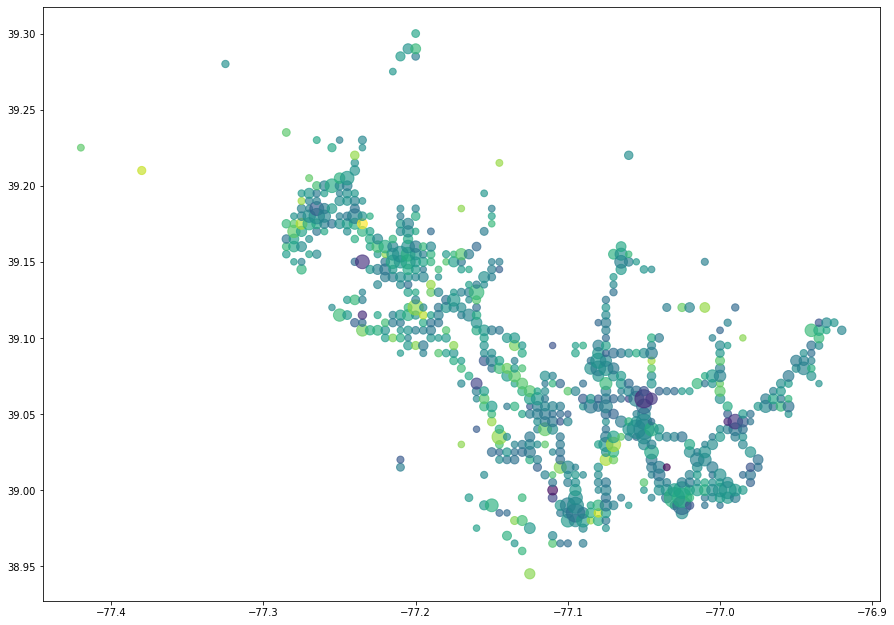

In [64]:
filter_gdf = gdf[(gdf['Total_Stops']>300)]
# filter_gdf = gdf[(gdf['Stops_per_Accident']<150) & (gdf['Total_Stops']>300)]

filter_gdf.plot(markersize=np.power(filter_gdf['Total_Stops'], 0.65), figsize=(15,15), c=np.log(filter_gdf['Stops_per_Accident']), alpha=.65, legend=True)

In [50]:
[x for x in station_locations]

NameError: name 'shapely' is not defined

## Raw, unweighted correlation betwen Stops and Accidents

In [65]:
gdf['Total_Stops'].corr(gdf['Total_Accidents'])

0.4769933604849849

## Let's plot Total_Accidents vs. Total_Stops in each tile

<AxesSubplot:xlabel='Total_Stops', ylabel='Total_Accidents'>

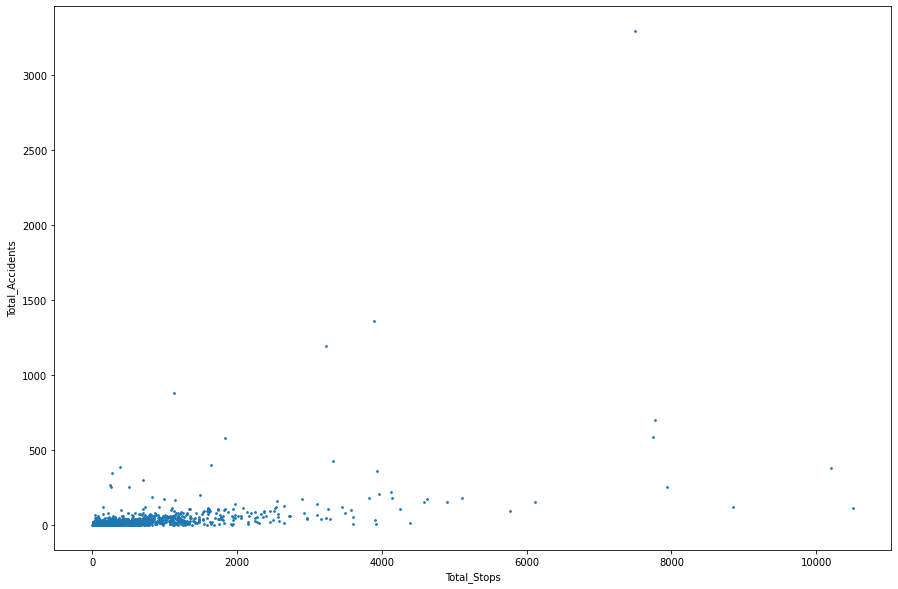

In [66]:
geo_df.plot(kind='scatter', x="Total_Stops", y="Total_Accidents", s=3, figsize=(15,10))

## Let's zoom in so we can see if there's a pattern on the bottom-left of this ^^ (where most tiles are)

Text(0.5, 1.0, 'Total Accidents vs. Stops')

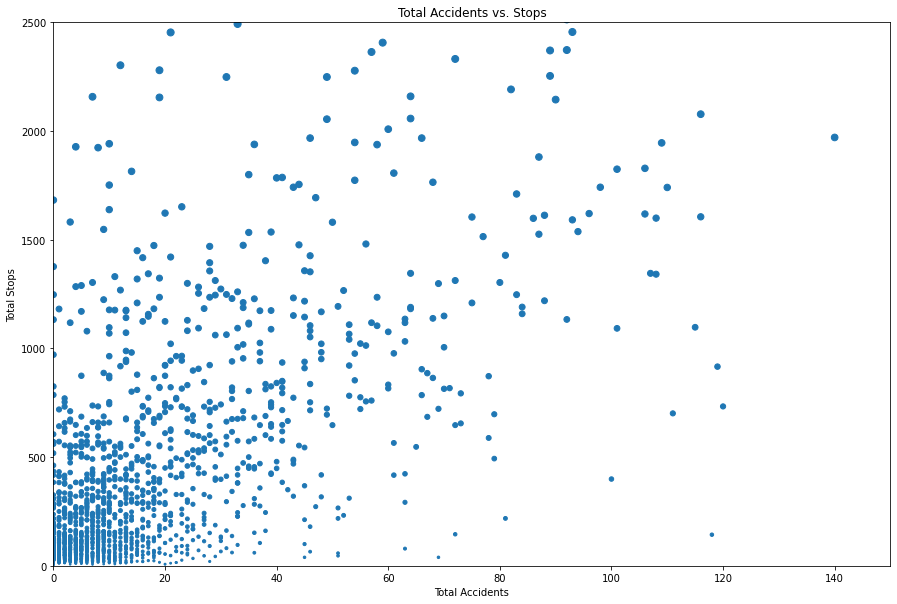

In [17]:
fig, ax1 = plt.subplots()

geo_df.plot(kind='scatter', y="Total_Stops", x="Total_Accidents", s=np.power(geo_df['Total_Stops'], .5), figsize=(15,10), ylim=(0,2500), xlim=(0,150), ax=ax1, legend=True)

plt.title("Total_Accidents vs. Stops")

## We can see a very loose relationship, if any

### Weighted corr (probably wrong)

In [233]:
# np.cov(geo_df['Total_Accidents'], geo_df['Total_Stops'], fweights=geo_df['Total_Stops'])

# weighted_VAR_total_accidents = np.cov(geo_df['Total_Accidents'], geo_df['Total_Stops'], fweights=geo_df['Total_Stops'])[0,0]
# weighted_VAR_total_stops = np.cov(geo_df['Total_Accidents'], geo_df['Total_Stops'], fweights=geo_df['Total_Stops'])[1,1]
# weighted_COV_total_accidents_stops = np.cov(geo_df['Total_Accidents'], geo_df['Total_Stops'], fweights=geo_df['Total_Stops'])[0,1]

# weighted_CORR_total_accidents_stops = weighted_COV_total_accidents_stops / (weighted_VAR_total_accidents * weighted_VAR_total_stops)
# corr_str = format(weighted_CORR_total_accidents_stops, 'f')
# print(f'Weighted correlation between Total_Accidents and Total_Stops is approx {corr_str}. MAYBE - DUBIOUS')

## Truncated Plot

Let's look at the plot after cutting away all tiles with less stops than a set lower bound

In [23]:
lower_bound = 600

pct_of_stops_above_lower_bound = 100 * ( geo_df[geo_df['Total_Stops'] > lower_bound]['Total_Stops'].sum() / geo_df['Total_Stops'].sum())

print(f'{round(pct_of_stops_above_lower_bound, 2)}% of stops are in tiles with over {lower_bound} stops')

72.39% of stops are in tiles with over 600 stops


Text(0.5, 1.0, 'Total_Accidents vs. Stops \n Size = Total Stops \n Color = Citations Per Stop')

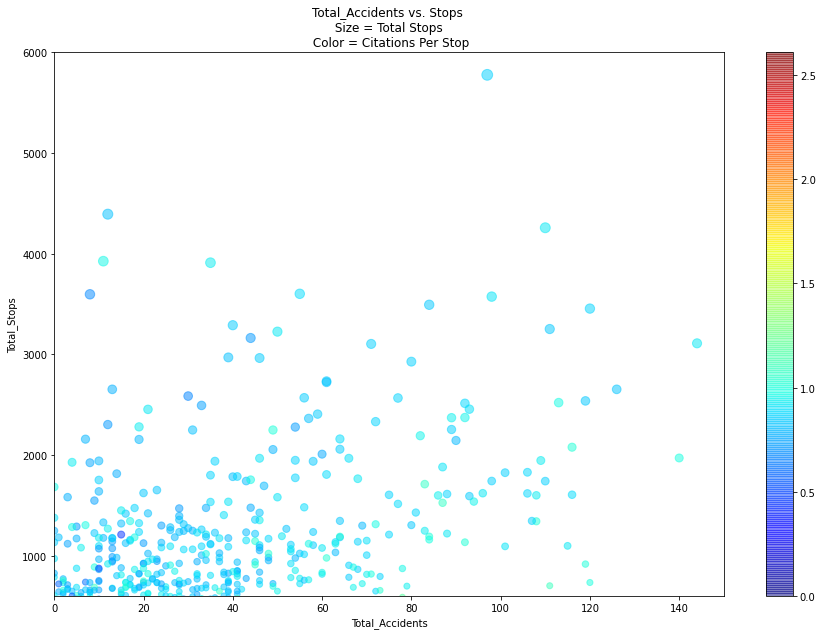

In [157]:
fig, ax1 = plt.subplots()

geo_df.plot(kind='scatter', y="Total_Stops", x="Total_Accidents", s=np.power(geo_df['Total_Stops'], .55), figsize=(15,10), ylim=(lower_bound,6000), xlim=(0,150), ax=ax1, legend=True, c=np.power(geo_df['Citations_per_Stop'], .35), cmap='jet', alpha=.5)

plt.title("Total_Accidents vs. Stops \n Size = Total Stops \n Color = Citations Per Stop")

## Citations per Stop should be determined by Total Accidents or Accidents per Stop

### Citations per Stop vs. Total Accidents - All Tiles

In [167]:
conda install -c conda-forge jupyter_nbextensions_configurator


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\mikha\Anaconda\envs\geopandas_env

  added / updated specs:
    - jupyter_nbextensions_configurator


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    argon2-cffi-20.1.0         |   py38h294d835_2          51 KB  conda-forge
    async_generator-1.10       |             py_0          18 KB  conda-forge
    bleach-3.3.0               |     pyh44b312d_0         111 KB  conda-forge
    cffi-1.14.5                |   py38hd8c33c5_0         228 KB  conda-forge
    defusedxml-0.7.1           |     pyhd8ed1ab_0          23 KB  conda-forge
    entrypoints-0.3            |  pyhd8ed1ab_1003           8 KB  conda-forge
    importlib-metadata-3.10.0  |   py38haa244fe_0          27 KB  conda-forge
    jinja2-2.11.3              |     pyh44b312d_0          93 KB  conda-forge
    jsonschema-3.2.0           |    

jsonschema-3.2.0     | 45 KB     |            |   0% 
jsonschema-3.2.0     | 45 KB     | ########## | 100% 
jsonschema-3.2.0     | 45 KB     | ########## | 100% 

pyyaml-5.4.1         | 159 KB    |            |   0% 
pyyaml-5.4.1         | 159 KB    | ########## | 100% 
pyyaml-5.4.1         | 159 KB    | ########## | 100% 

pandocfilters-1.4.2  | 9 KB      |            |   0% 
pandocfilters-1.4.2  | 9 KB      | ########## | 100% 

zipp-3.4.1           | 11 KB     |            |   0% 
zipp-3.4.1           | 11 KB     | ########## | 100% 
zipp-3.4.1           | 11 KB     | ########## | 100% 

jupyter_contrib_core | 15 KB     |            |   0% 
jupyter_contrib_core | 15 KB     | ########## | 100% 
jupyter_contrib_core | 15 KB     | ########## | 100% 

webencodings-0.5.1   | 12 KB     |            |   0% 
webencodings-0.5.1   | 12 KB     | ########## | 100% 

cffi-1.14.5          | 228 KB    |            |   0% 
cffi-1.14.5          | 228 KB    | ######3    |  63% 
cffi-1.14.5          |

Text(0.5, 1.0, 'Citations Per Stop vs. Total Accidents \n Size = Total Stops \n Color = Accident Per Stop')

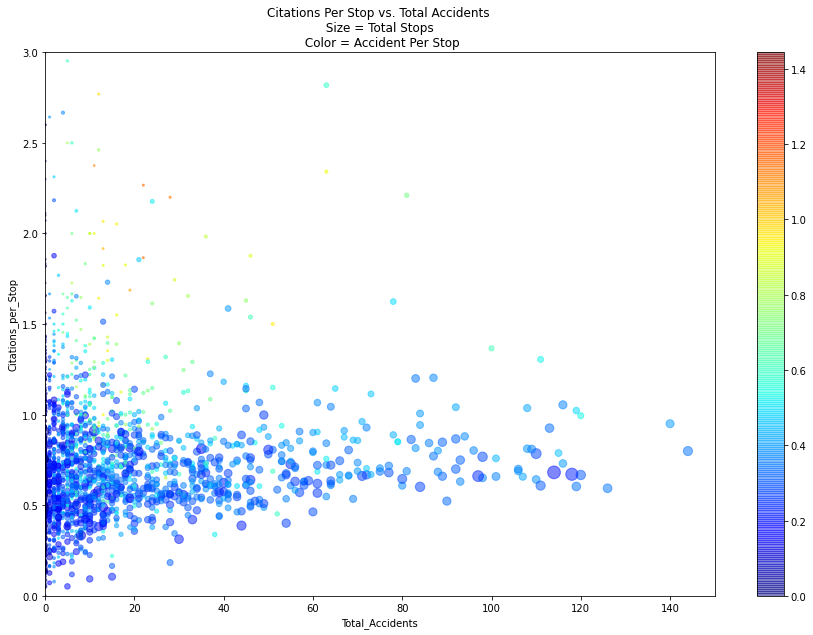

In [161]:
fig, ax1 = plt.subplots()

geo_df.plot(kind='scatter', y="Citations_per_Stop", x="Total_Accidents", s=np.power(geo_df['Total_Stops'], .55), figsize=(15,10), ylim=(0,3), xlim=(0,150), ax=ax1, legend=True, c=np.power(geo_df['Accidents_per_Stop'], .35), cmap='jet', alpha=.5)

plt.title("Citations Per Stop vs. Total Accidents \n Size = Total Stops \n Color = Accident Per Stop")

In [ ]:
race_str = ''.join([f'pct_Stops_{race} + ' for race in race_set-{'NATIVE AMERICAN', 'OTHER'}])[:-3]
race_str

In [166]:
mod = smf.wls(formula=f'Citations_per_Stop ~ Total_Accidents + {race_str}', data=geo_df, weights=geo_df['Total_Stops'])
res = mod.fit(cov_type='HC3')
print(res.summary())

                            WLS Regression Results                            
Dep. Variable:     Citations_per_Stop   R-squared:                       0.473
Model:                            WLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     12.15
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.27e-11
Time:                        17:44:48   Log-Likelihood:                -1677.5
No. Observations:                2014   AIC:                             3367.
Df Residuals:                    2008   BIC:                             3401.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.5605      0

### Citations per Stop vs. Total Accidents - Tiles with $\geq 600$ stops

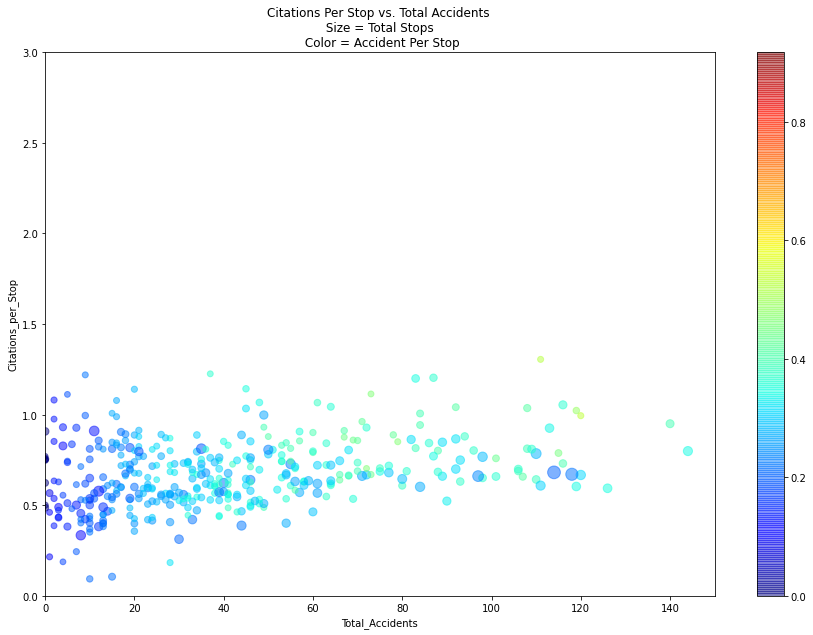

In [162]:
geo_df_subset = geo_df[geo_df['Total_Stops']>=600]

fig, ax1 = plt.subplots()

geo_df_subset.plot(kind='scatter', y="Citations_per_Stop", x="Total_Accidents", s=np.power(geo_df_subset['Total_Stops'], .55), figsize=(15,10), ylim=(0,3), xlim=(0,150), ax=ax1, legend=True, c=np.power(geo_df_subset['Accidents_per_Stop'], .35), cmap='jet', alpha=.5)

plt.title("Citations Per Stop vs. Total Accidents \n Size = Total Stops \n Color = Accident Per Stop")

del geo_df_subset

In [ ]:
fig, ax1 = plt.subplots()

geo_df.plot(kind='scatter', y="Citations_per_Stop", x="Total_Accidents", s=np.power(geo_df['Total_Stops'], .55), figsize=(15,10), ylim=(0,3), xlim=(0,150), ax=ax1, legend=True, c=np.power(geo_df['Citations_per_Stop'], .35), cmap='jet', alpha=.5)

plt.title("Total_Accidents vs. Stops \n Size = Total Stops \n Color = Citations Per Stop")

In [234]:
np.corrcoef(geo_df[geo_df['Total_Stops']>lower_bound]['Total_Stops'], geo_df[geo_df['Total_Stops']>lower_bound]['Total_Accidents'])

array([[1.        , 0.42919404],
       [0.42919404, 1.        ]])

## Regression Analysis

In [228]:
geo_df['Total_Accidents'] = geo_df['Total_Accidents']
geo_df['Total_Stops'] = geo_df['Total_Stops']

In [232]:
mod = smf.wls(formula='Total_Stops ~ Total_Accidents', data=geo_df, weights=geo_df['Total_Stops'])
res = mod.fit()
print(res.summary())

                            WLS Regression Results                            
Dep. Variable:            Total_Stops   R-squared:                       0.185
Model:                            WLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     457.7
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.14e-91
Time:                        01:59:59   Log-Likelihood:                -19243.
No. Observations:                2014   AIC:                         3.849e+04
Df Residuals:                    2012   BIC:                         3.850e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1665.5838     47.918     

# Conclusion from above - Accidents explain 18.5% of the variation in MCPD Stops

Note: this is probably an overestimate, since we likely suffer from OVB of popularity of roads - the more popular a road is, the more likely police *and* civilians are to drive on it - therefore, civilians are more likely to get into accidents, and police are more likely to see civilians and pull them over. 18.5% is honestly lower than I would expect if MCPD assigned officers irrespective of accidents.

## Is race a better predictor than accidents?

In [19]:
# for race in race_set-{'NATIVE AMERICAN'}:
#     geo_df[f'pct_Stops_{race}'] = geo_df[f'% Stops {race}']

In [91]:
race_str = ''.join([f'pct_Stops_{race} + ' for race in race_set-{'NATIVE AMERICAN', 'OTHER'}])[:-3]
race_str

'pct_Stops_HISPANIC + pct_Stops_WHITE + pct_Stops_BLACK + pct_Stops_ASIAN'

In [254]:
race_mod = smf.wls(formula=f'Total_Stops ~ Total_Accidents + {race_str}', data=geo_df, weights=geo_df['Total_Stops'])
race_res = race_mod.fit()
print(race_res.summary())

                            WLS Regression Results                            
Dep. Variable:            Total_Stops   R-squared:                       0.252
Model:                            WLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     135.4
Date:                Fri, 02 Apr 2021   Prob (F-statistic):          6.30e-124
Time:                        02:12:06   Log-Likelihood:                -19157.
No. Observations:                2014   AIC:                         3.833e+04
Df Residuals:                    2008   BIC:                         3.836e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1283.5894   1726

## Race is a better predictor of MCPD stops than accidents

Race explains 25% of the variation in MCPD stops.

# Race vs. Citations_per_Stop

In [83]:
geo_df['Accidents_per_Stop'].max()

2.857142857142857

                            WLS Regression Results                            
Dep. Variable:     Citations_per_Stop   R-squared:                       0.032
Model:                            WLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     2.837
Date:                Fri, 02 Apr 2021   Prob (F-statistic):             0.0929
Time:                        13:35:26   Log-Likelihood:                -309.21
No. Observations:                 423   AIC:                             622.4
Df Residuals:                     421   BIC:                             630.5
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6211      0

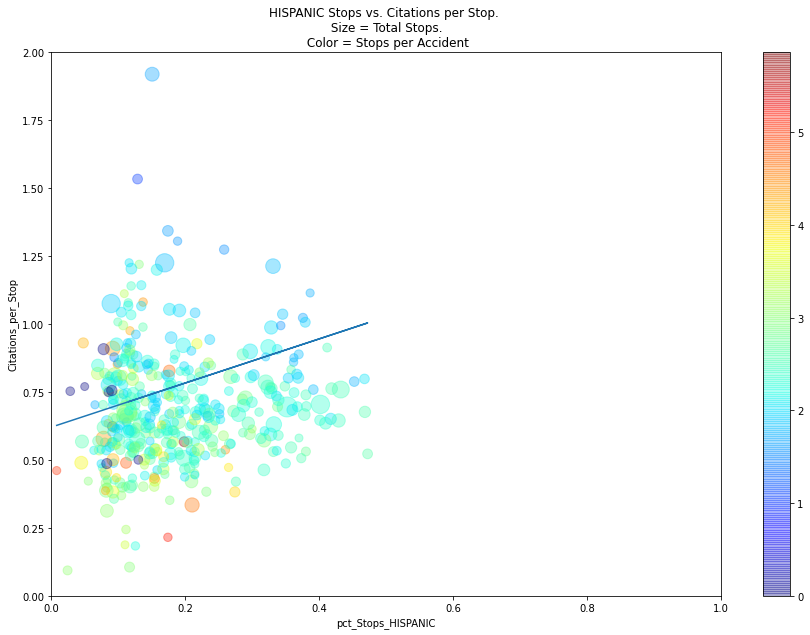

                            WLS Regression Results                            
Dep. Variable:     Citations_per_Stop   R-squared:                       0.036
Model:                            WLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     9.092
Date:                Fri, 02 Apr 2021   Prob (F-statistic):            0.00272
Time:                        13:35:26   Log-Likelihood:                -308.31
No. Observations:                 423   AIC:                             620.6
Df Residuals:                     421   BIC:                             628.7
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9925      0.099     

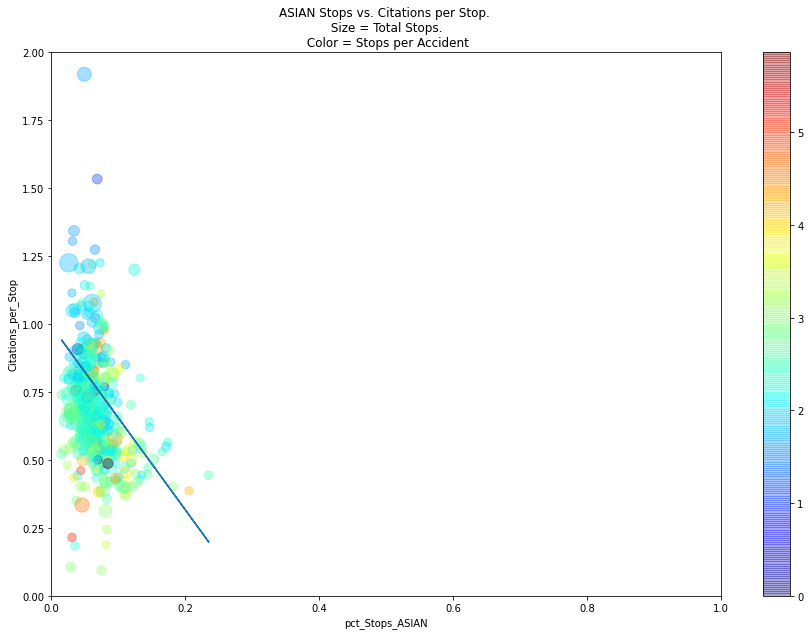

                            WLS Regression Results                            
Dep. Variable:     Citations_per_Stop   R-squared:                       0.051
Model:                            WLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     7.364
Date:                Fri, 02 Apr 2021   Prob (F-statistic):            0.00693
Time:                        13:35:26   Log-Likelihood:                -304.89
No. Observations:                 423   AIC:                             613.8
Df Residuals:                     421   BIC:                             621.9
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1341      0.159     

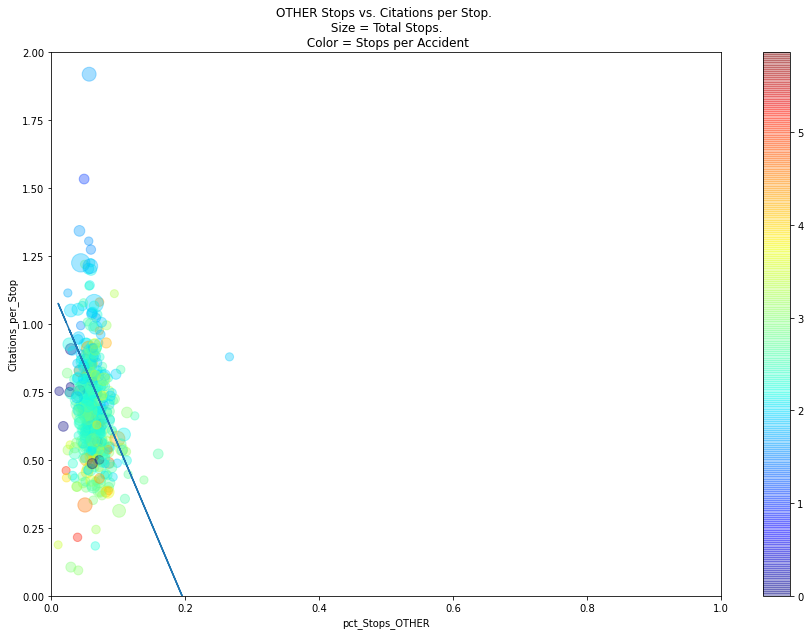

                            WLS Regression Results                            
Dep. Variable:     Citations_per_Stop   R-squared:                       0.027
Model:                            WLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     7.271
Date:                Fri, 02 Apr 2021   Prob (F-statistic):            0.00729
Time:                        13:35:27   Log-Likelihood:                -310.31
No. Observations:                 423   AIC:                             624.6
Df Residuals:                     421   BIC:                             632.7
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5949      0.071     

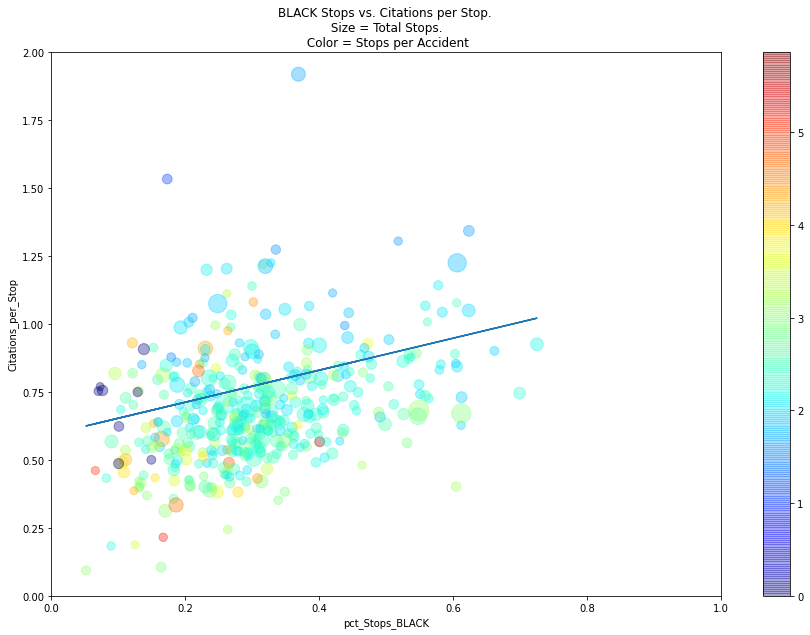

                            WLS Regression Results                            
Dep. Variable:     Citations_per_Stop   R-squared:                       0.038
Model:                            WLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.688
Date:                Fri, 02 Apr 2021   Prob (F-statistic):            0.00338
Time:                        13:35:27   Log-Likelihood:                -307.80
No. Observations:                 423   AIC:                             619.6
Df Residuals:                     421   BIC:                             627.7
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9934      0.102     

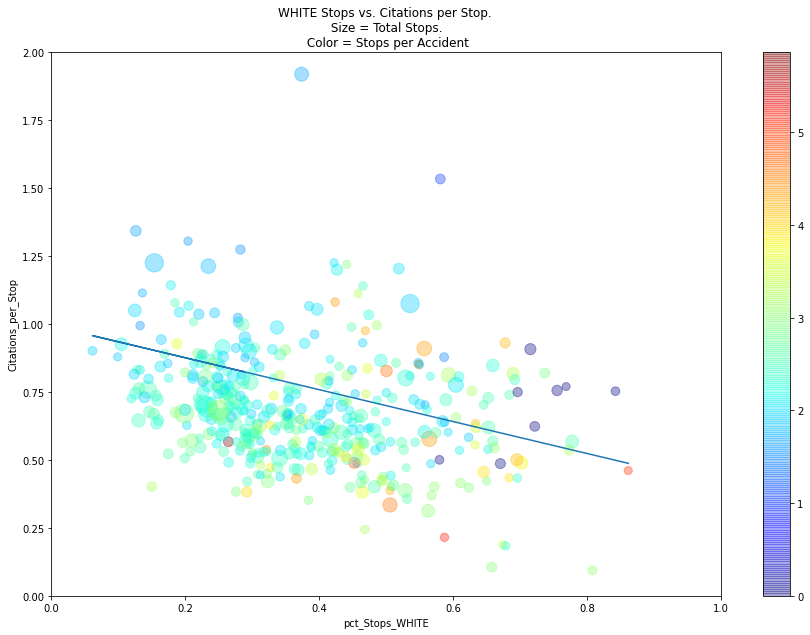

In [116]:
geo_df_subset = geo_df[geo_df['Total_Stops']>=lower_bound]

for race in race_set-{'NATIVE AMERICAN'}:
    
    reg = smf.wls(formula=f'Citations_per_Stop ~ pct_Stops_{race}', data=geo_df_subset, weights=geo_df_subset['Total_Stops']).fit(cov_type='HC3')
    print(reg.summary())
    
    fig, ax1 = plt.subplots()
    geo_df_subset.plot(kind='scatter', y="Citations_per_Stop", x=f"pct_Stops_{race}", s=np.power(geo_df_subset['Total_Stops'], .65), figsize=(15,10), ylim=(0,2), xlim=(0,1), ax=ax1, legend=True, c=np.power(geo_df_subset['Stops_per_Accident'], .25), cmap='jet', alpha=.35)
    ax1.plot(geo_df_subset[f'pct_Stops_{race}'], reg.predict())
    plt.title(f"{race} Stops vs. Citations per Stop. \n Size = Total Stops. \n Color = Stops per Accident")
    plt.show()

In [142]:
pip install mpld3

  Created wheel for mpld3: filename=mpld3-0.5.2-py3-none-any.whl size=200617 sha256=d05151abe2c7d4725f53cf6c655fdcd2f80f8a6682a8f60e3f99661b43d0466e
  Stored in directory: c:\users\mikha\appdata\local\pip\cache\wheels\d1\fb\75\f5b4dc0a7eb149b7ca745beeced5a286e4e8ab3a8cdb45bd1b
Successfully built mpld3
Note: you may need to restart the kernel to use updated packages.


In [144]:
import mpld3

In [150]:
geo_df_subset = geo_df[geo_df['Total_Stops']>=lower_bound]

for race in race_set-{'NATIVE AMERICAN'}:
    
    yvar = 'pct_Altered'
    xvar = f'pct_Stops_{race}'
    
    reg = smf.wls(formula=f'{yvar} ~ {xvar}', data=geo_df_subset, weights=geo_df_subset['Total_Stops']).fit(cov_type='HC3')
    print(reg.summary())
    
    fig, ax1 = plt.subplots()
    geo_df_subset.plot(kind='scatter', y=yvar, x=xvar, s=np.power(geo_df_subset['Total_Stops'], .65), figsize=(15,10), xlim=(0,1), ylim=(0,1), ax=ax1, legend=True, c=np.power(geo_df_subset['Citations_per_Stop'], .25), cmap='jet', alpha=.5)
    ax1.plot(geo_df_subset[xvar], reg.predict())
    plt.title(f"{xvar} vs. {yvar}. \n Size = Total Stops. \n Color = Citations_per_Stop")
#     plt.show()
    mpld3.display(fig)

                            WLS Regression Results                            
Dep. Variable:            pct_Altered   R-squared:                       0.004
Model:                            WLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                    0.8116
Date:                Fri, 02 Apr 2021   Prob (F-statistic):              0.368
Time:                        17:25:36   Log-Likelihood:                -82.654
No. Observations:                 423   AIC:                             169.3
Df Residuals:                     421   BIC:                             177.4
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.8119      0

                            WLS Regression Results                            
Dep. Variable:     Stops_per_Accident   R-squared:                       0.038
Model:                            WLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     19.95
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.02e-05
Time:                        13:52:40   Log-Likelihood:                -2566.4
No. Observations:                 423   AIC:                             5137.
Df Residuals:                     421   BIC:                             5145.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             96.2225     12

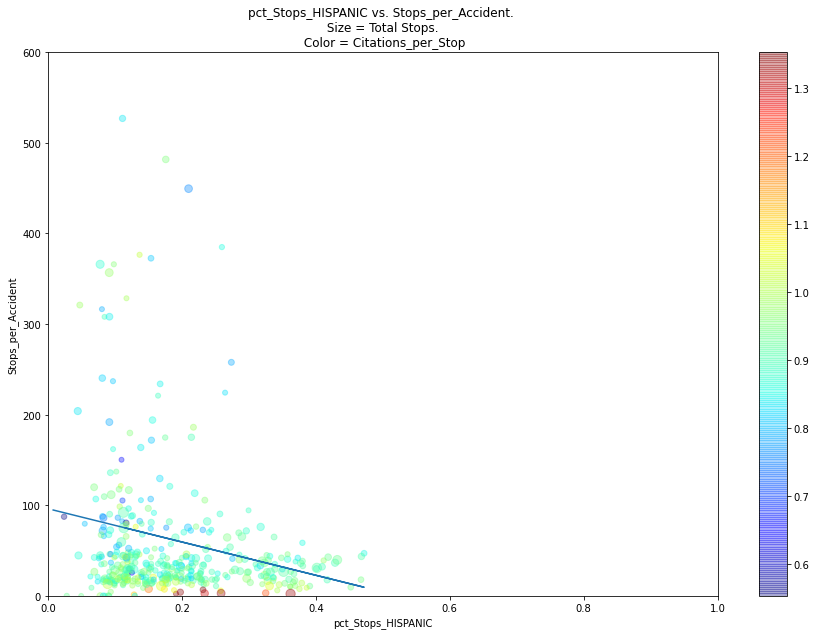

                            WLS Regression Results                            
Dep. Variable:     Stops_per_Accident   R-squared:                       0.016
Model:                            WLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     7.216
Date:                Fri, 02 Apr 2021   Prob (F-statistic):            0.00751
Time:                        13:52:40   Log-Likelihood:                -2571.0
No. Observations:                 423   AIC:                             5146.
Df Residuals:                     421   BIC:                             5154.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          30.3636     11.495     

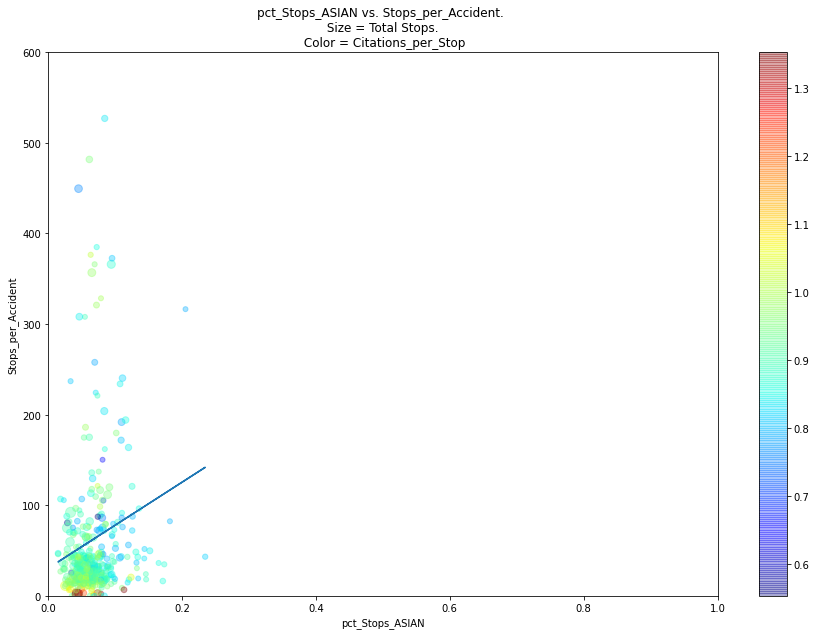

                            WLS Regression Results                            
Dep. Variable:     Stops_per_Accident   R-squared:                       0.008
Model:                            WLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.918
Date:                Fri, 02 Apr 2021   Prob (F-statistic):              0.167
Time:                        13:52:40   Log-Likelihood:                -2572.8
No. Observations:                 423   AIC:                             5150.
Df Residuals:                     421   BIC:                             5158.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          31.4139     20.488     

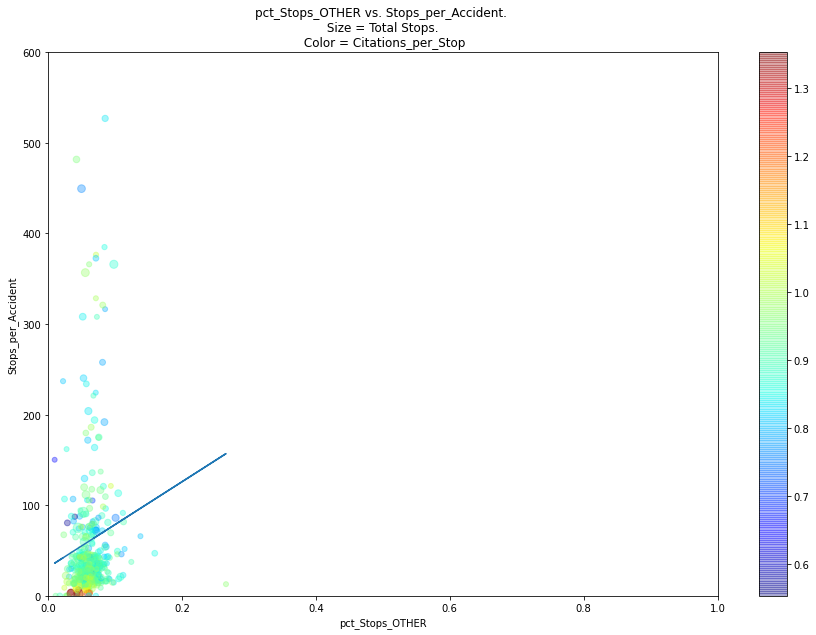

                            WLS Regression Results                            
Dep. Variable:     Stops_per_Accident   R-squared:                       0.032
Model:                            WLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     9.348
Date:                Fri, 02 Apr 2021   Prob (F-statistic):            0.00238
Time:                        13:52:41   Log-Likelihood:                -2567.7
No. Observations:                 423   AIC:                             5139.
Df Residuals:                     421   BIC:                             5147.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         102.1495     16.617     

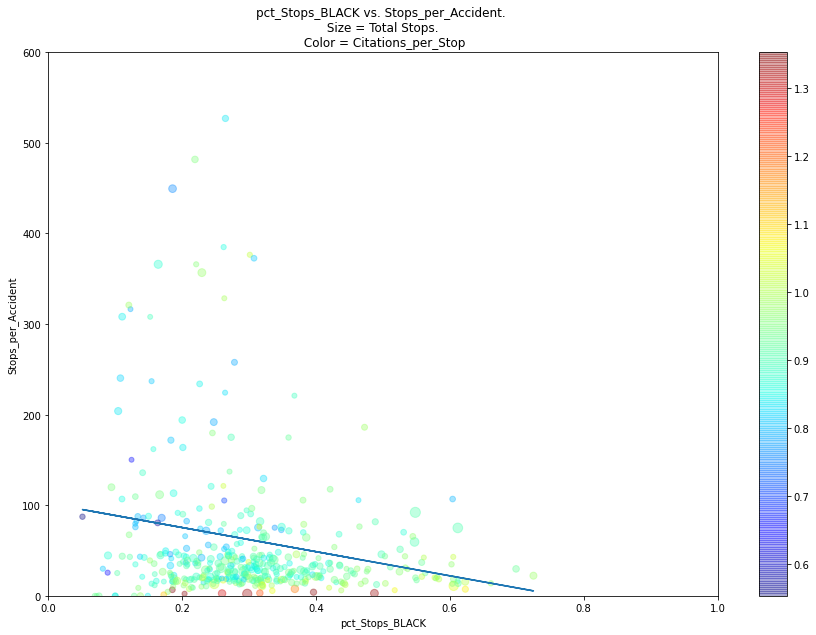

                            WLS Regression Results                            
Dep. Variable:     Stops_per_Accident   R-squared:                       0.060
Model:                            WLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     15.59
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           9.22e-05
Time:                        13:52:41   Log-Likelihood:                -2561.4
No. Observations:                 423   AIC:                             5127.
Df Residuals:                     421   BIC:                             5135.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.5915     11.760     

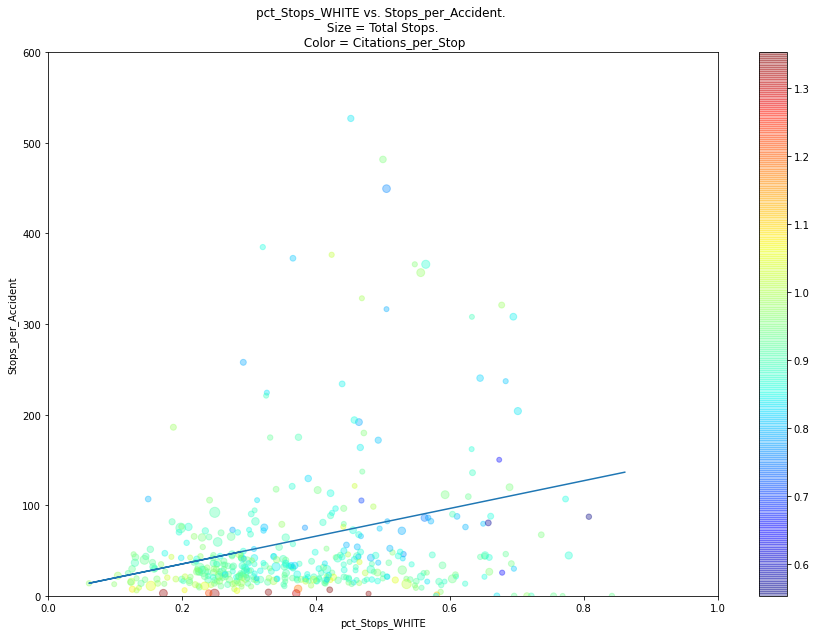

In [128]:
geo_df_subset = geo_df[geo_df['Total_Stops']>=lower_bound]

for race in race_set-{'NATIVE AMERICAN'}:
    
    yvar = 'Stops_per_Accident'
    xvar = f'pct_Stops_{race}'
    
    reg = smf.wls(formula=f'{yvar} ~ {xvar}', data=geo_df_subset, weights=geo_df_subset['Total_Stops']).fit(cov_type='HC3')
    print(reg.summary())
    
    fig, ax1 = plt.subplots()
    geo_df_subset.plot(kind='scatter', y=yvar, x=xvar, s=np.power(geo_df_subset['Total_Stops'], .5), figsize=(15,10), xlim=(0,1), ylim=(0,600), ax=ax1, legend=True, c=np.power(geo_df_subset['Citations_per_Stop'], .25), cmap='jet', alpha=.35)
    ax1.plot(geo_df_subset[xvar], reg.predict())
    plt.title(f"{xvar} vs. {yvar}. \n Size = Total Stops. \n Color = Citations_per_Stop")
    plt.show()

In [ ]:
geo_df['Distance_to_Closest_Station']

'pct_Stops_HISPANIC + pct_Stops_WHITE + pct_Stops_BLACK'

In [103]:
# race_str-{"ASIAN", "OTHER"}
race_mod = smf.wls(formula=f'Total_Stops ~ Total_Accidents + {race_str[:-18]} + Distance_to_Closest_Station', data=geo_df, weights=geo_df['Total_Stops'])
race_res = race_mod.fit(cov_type='HC3')
print(race_res.summary())



                            WLS Regression Results                            
Dep. Variable:            Total_Stops   R-squared:                       0.256
Model:                            WLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     8.004
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.75e-07
Time:                        13:24:14   Log-Likelihood:                -19152.
No. Observations:                2014   AIC:                         3.832e+04
Df Residuals:                    2008   BIC:                         3.835e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [104]:
race_mod = smf.wls(formula=f'Total_Stops ~ Total_Accidents', data=geo_df, weights=geo_df['Total_Stops'])
race_res = race_mod.fit(cov_type='HC3')
print(race_res.summary())

                            WLS Regression Results                            
Dep. Variable:            Total_Stops   R-squared:                       0.185
Model:                            WLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                    0.4694
Date:                Fri, 02 Apr 2021   Prob (F-statistic):              0.493
Time:                        13:25:08   Log-Likelihood:                -19243.
No. Observations:                2014   AIC:                         3.849e+04
Df Residuals:                    2012   BIC:                         3.850e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1665.5838    346.493     

<AxesSubplot:xlabel='Accidents per Stop', ylabel='Total Stops'>

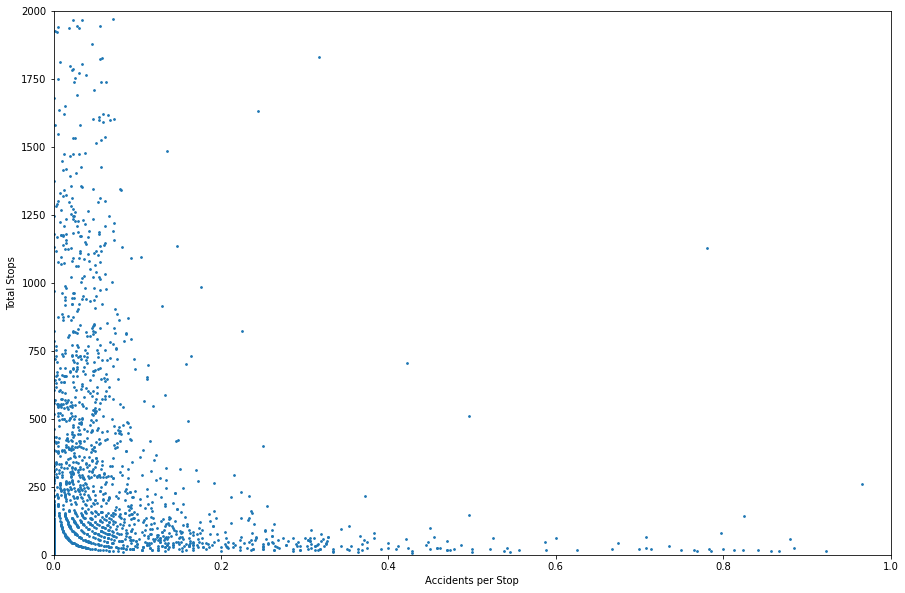

In [147]:
geo_df.plot(kind='scatter', y="Total_Stops", x="Accidents_per_Stop", s=3, figsize=(15,10), ylim=(0,2000), xlim=(0,1))

<AxesSubplot:xlabel='Total Accidents', ylabel='Accidents per Stop'>

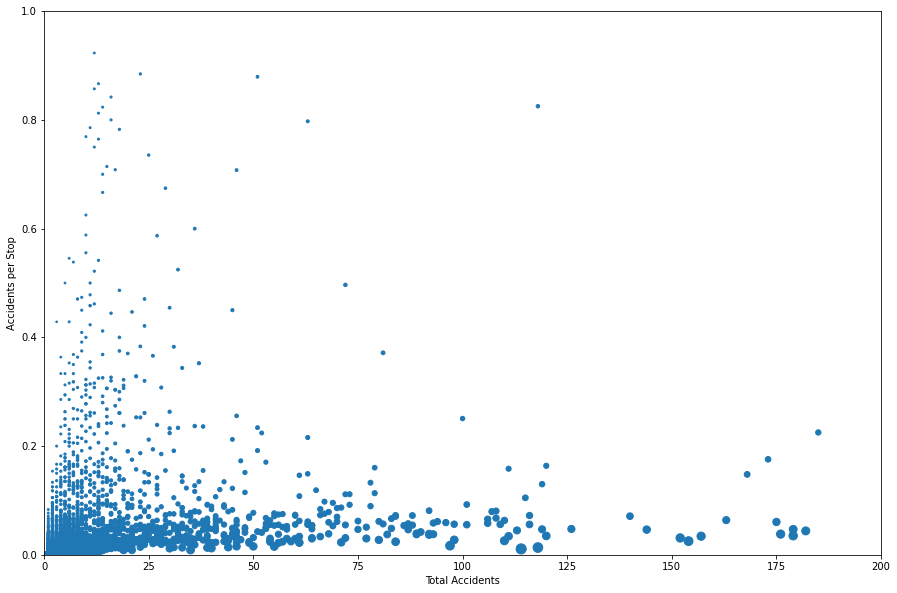

In [157]:
geo_df.plot(kind='scatter', x="Total_Accidents", y="Accidents_per_Stop", figsize=(15,10), ylim=(0,1), xlim=(0,200), s=np.power(geo_df['Total_Stops'], .5))